# Project: Investigate life expectancy with respect to some other life quality indicators

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project I was exploring the [Gapminder World](https://www.gapminder.org/data/) dataset, ivestigating life expectancy as a indicatoe dependent on the following indicators:
- percentage of one year old children who have received three doses of combined diphteria, pertussis toxoid and tetanus vaccine during the year (dtp3_immunized_percent_of_one_year_olds.csv table), 
- the average number of years of school attended by all men 25 to 34 years (mean_years_in_school_men_25_to_34_years.csv),
- the average number of years of school attended by all women 25 to 34 years (mean_years_in_school_women_25_to_34_years.csv).

Life expectancy data were taken from life_expectancy_years.csv table, which includes data for years 1900 to 2018.
The education data are present for years 1970 to 2015 and vaccination data are present for years 1980 to 2011.

This study aims to answer the following questions:
- How are the indicators considered changing with time?
- Are there any countries which are growing faster than the others? Are there any countries that are growing slower than the others?
- Is there any correlation between the indicators chosen? For which indicators the correlation is the strongest?

<a id='wrangling'></a>
## Data Wrangling

In this section I'm going to import the data, clean it and prepare for later investigation.

In [329]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy.stats import ks_2samp
%matplotlib inline 

In [330]:
# importing data, setting country name as index column
df_le = pd.read_csv('life_expectancy_years.csv', index_col = 'geo')
df_dtp3 = pd.read_csv('dtp3_immunized_percent_of_one_year_olds.csv', index_col = 'geo')
df_school_men = pd.read_csv('mean_years_in_school_men_25_to_34_years.csv', index_col = 'geo')
df_school_women = pd.read_csv('mean_years_in_school_women_25_to_34_years.csv', index_col = 'geo')

We need to overview the data to see any missing values or outliers.

In [331]:
print("Average life expectancy");
print(df_le.info())

Average life expectancy
<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Columns: 219 entries, 1800 to 2018
dtypes: float64(219)
memory usage: 321.4+ KB
None


In [332]:
df_le.isnull().any().sum() #number of columns which have missing values

172

In [333]:
df_le[df_le.isnull().any(axis=1) == True].index # countries which have any mising values

Index(['Andorra', 'Dominica', 'Marshall Islands'], dtype='object', name='geo')

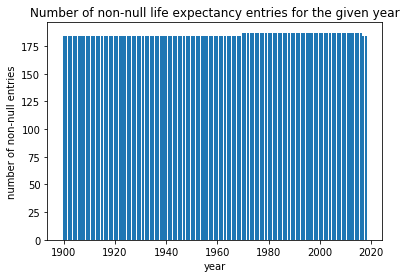

In [334]:
# number of non-null entries 
ind = np.arange(1900,2019);
cnt = []
for year in ind:
    cnt.append(df_le[str(year)].count());
plt.title('Number of non-null life expectancy entries for the given year')
plt.xlabel('year')
plt.ylabel('number of non-null entries')
plt.bar(ind, cnt);
plt.show()

So df_le has three countries with a lot of data missing: Andorra, created in 1278, Dominica, created in 1978, and Marshall Islands, independent since 1986. The best way for dealing with these missing data would be deleting the data for Dominica and Marshall Islands and replacing the data for Andorra with the corresponding columns'mean.

In [335]:
df_le.drop(['Dominica', 'Marshall Islands'], axis = 0, inplace = True)
df_le.fillna(df_le.mean(), inplace = True)
df_le.isnull().any().sum()

0

In [336]:
print("Average dtp3 vaccination percentage in one-year-olds")
print(df_dtp3.info())

Average dtp3 vaccination percentage in one-year-olds
<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, Afghanistan to Zimbabwe
Data columns (total 32 columns):
1980    102 non-null float64
1981    122 non-null float64
1982    127 non-null float64
1983    140 non-null float64
1984    149 non-null float64
1985    155 non-null float64
1986    158 non-null float64
1987    160 non-null float64
1988    162 non-null float64
1989    162 non-null float64
1990    162 non-null float64
1991    163 non-null float64
1992    181 non-null float64
1993    186 non-null float64
1994    187 non-null float64
1995    187 non-null float64
1996    187 non-null float64
1997    188 non-null float64
1998    187 non-null float64
1999    190 non-null float64
2000    190 non-null float64
2001    190 non-null float64
2002    191 non-null float64
2003    191 non-null float64
2004    191 non-null float64
2005    191 non-null float64
2006    192 non-null float64
2007    192 non-null float64
2008    192 non-null

In [337]:
df_dtp3.isnull().any().sum() #number of columns which have missing values

31

In [338]:
df_dtp3[df_dtp3.isnull().any(axis=1) == True].index

Index(['Algeria', 'Andorra', 'Angola', 'Armenia', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Benin', 'Bosnia and Herzegovina', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'China',
       'Comoros', 'Congo, Dem. Rep.', 'Cote d'Ivoire', 'Croatia',
       'Czech Republic', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Gabon', 'Georgia', 'Germany', 'Guinea', 'Guinea-Bissau',
       'Indonesia', 'Italy', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Lao',
       'Latvia', 'Liberia', 'Lithuania', 'Luxembourg', 'Macedonia, FYR',
       'Madagascar', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania',
       'Micronesia, Fed. Sts.', 'Moldova', 'Monaco', 'Montenegro', 'Morocco',
       'Mozambique', 'Namibia', 'Nauru', 'Niger', 'Nigeria', 'Norway', 'Palau',
       'Palestine', 'Romania', 'Russia', 'Rwanda', 'San Marino',
       'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles',
       'Sierra Leone', 'Slovak Rep

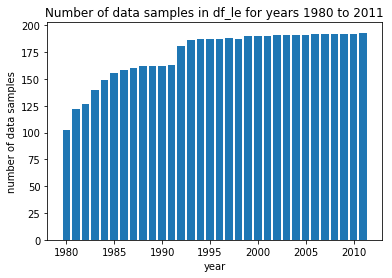

In [339]:
ind = np.arange(1980,2012);
cnt = []
for year in ind:
    cnt.append(df_dtp3[str(year)].count());
plt.title('Number of data samples in df_le for years 1980 to 2011')
plt.xlabel('year')
plt.ylabel('number of data samples')
plt.bar(ind, cnt);

We can see that there are a lot of missing values before about 1985, after that there are more than 150 non-null rows of 192 rows total, which is about 78%. The best way to avoid losing too much data seems to be exluding years 1980 - 1985 from the table and replacing the null values in the rest of the table with the mean for the given year.

In [340]:
to_drop = []
for year in range(1980,1986):
    to_drop.append(str(year))
df_dtp3.drop(to_drop, axis=1, inplace=True)
df_dtp3.fillna(df_dtp3.mean(), inplace = True)
df_dtp3.isnull().any().sum()

0

We'll now overview numbers of years men and women of 25 to 34 years spend in school.

In [341]:
print("Average number of years men of 25 to 34 spend in school")
print(df_school_men.info());

Average number of years men of 25 to 34 spend in school
<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 46 columns):
1970    187 non-null float64
1971    187 non-null float64
1972    187 non-null float64
1973    187 non-null float64
1974    187 non-null float64
1975    187 non-null float64
1976    187 non-null float64
1977    187 non-null float64
1978    187 non-null float64
1979    187 non-null float64
1980    187 non-null float64
1981    187 non-null float64
1982    187 non-null float64
1983    187 non-null float64
1984    187 non-null float64
1985    187 non-null float64
1986    187 non-null float64
1987    187 non-null float64
1988    187 non-null float64
1989    187 non-null float64
1990    187 non-null float64
1991    187 non-null float64
1992    187 non-null float64
1993    187 non-null float64
1994    187 non-null float64
1995    187 non-null float64
1996    187 non-null float64
1997    187 non-null float64
1998    187 non-n

In [342]:
print("Average number of years women of 25 to 34 spend in school")
print(df_school_women.info());

Average number of years women of 25 to 34 spend in school
<class 'pandas.core.frame.DataFrame'>
Index: 187 entries, Afghanistan to Zimbabwe
Data columns (total 46 columns):
1970    187 non-null float64
1971    187 non-null float64
1972    187 non-null float64
1973    187 non-null float64
1974    187 non-null float64
1975    187 non-null float64
1976    187 non-null float64
1977    187 non-null float64
1978    187 non-null float64
1979    187 non-null float64
1980    187 non-null float64
1981    187 non-null float64
1982    187 non-null float64
1983    187 non-null float64
1984    187 non-null float64
1985    187 non-null float64
1986    187 non-null float64
1987    187 non-null float64
1988    187 non-null float64
1989    187 non-null float64
1990    187 non-null float64
1991    187 non-null float64
1992    187 non-null float64
1993    187 non-null float64
1994    187 non-null float64
1995    187 non-null float64
1996    187 non-null float64
1997    187 non-null float64
1998    187 non

Apparently there are no null values in the tables for men's and women's average number of years in school.

In [343]:
print("Average life expectancy");
print(df_le.describe());

Average life expectancy
             1800        1801        1802        1803        1804        1805  \
count  185.000000  185.000000  185.000000  185.000000  185.000000  185.000000   
mean    31.502717   31.461957   31.478804   31.383152   31.459239   31.586413   
std      3.804309    3.795946    3.927957    3.951594    3.923968    3.999970   
min     23.400000   23.400000   23.400000   19.600000   23.400000   23.400000   
25%     29.100000   29.000000   28.900000   28.900000   29.000000   29.100000   
50%     31.700000   31.600000   31.500000   31.500000   31.500000   31.600000   
75%     33.800000   33.900000   33.800000   33.600000   33.700000   33.800000   
max     42.900000   40.300000   44.400000   44.800000   42.800000   44.300000   

             1806        1807        1808        1809     ...            2009  \
count  185.000000  185.000000  185.000000  185.000000     ...      185.000000   
mean    31.644565   31.598370   31.383152   31.310326     ...       70.017838   
std

In [344]:
print("Average dtp3 vaccination percentage in one-year-olds")
print(df_dtp3.describe());

Average dtp3 vaccination percentage in one-year-olds
             1986        1987        1988        1989        1990        1991  \
count  193.000000  193.000000  193.000000  193.000000  193.000000  193.000000   
mean    63.120253   66.531250   70.327160   74.512346   78.469136   76.625767   
std     25.002158   23.850647   21.871507   19.726314   18.298785   19.188779   
min      3.000000    7.000000    9.000000   13.000000   17.000000   16.000000   
25%     48.000000   56.000000   60.000000   65.000000   76.000000   72.000000   
50%     63.120253   66.531250   70.327160   78.000000   83.000000   79.000000   
75%     82.000000   85.000000   87.000000   89.000000   91.000000   90.000000   
max     99.000000   99.000000   99.000000   99.000000   99.000000   99.000000   

             1992        1993        1994        1995     ...            2002  \
count  193.000000  193.000000  193.000000  193.000000     ...      193.000000   
mean    77.232044   77.333333   78.967914   80.577540  

In [345]:
print("Average number of years men of 25 to 34 spend in school")
print(df_school_men.describe());

Average number of years men of 25 to 34 spend in school
             1970        1971        1972        1973        1974        1975  \
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000   
mean     5.138128    5.240749    5.344118    5.448663    5.554385    5.661176   
std      2.346519    2.375467    2.404027    2.431096    2.457908    2.484031   
min      0.900000    0.930000    0.950000    0.980000    1.010000    1.030000   
25%      3.245000    3.320000    3.400000    3.480000    3.560000    3.640000   
50%      4.760000    4.880000    5.010000    5.130000    5.240000    5.340000   
75%      7.045000    7.175000    7.305000    7.435000    7.560000    7.695000   
max     12.200000   12.300000   12.400000   12.500000   12.600000   12.700000   

             1976        1977        1978        1979     ...            2006  \
count  187.000000  187.000000  187.000000  187.000000     ...      187.000000   
mean     5.770000    5.878717    5.988556    6.09978

In [346]:
print("Average number of years women of 25 to 34 spend in school")
print(df_school_women.describe());

Average number of years women of 25 to 34 spend in school
             1970        1971        1972        1973        1974        1975  \
count  187.000000  187.000000  187.000000  187.000000  187.000000  187.000000   
mean     4.231283    4.335989    4.442139    4.549733    4.659251    4.769733   
std      2.609100    2.655201    2.702362    2.747922    2.793765    2.838035   
min      0.210000    0.220000    0.220000    0.230000    0.240000    0.250000   
25%      1.805000    1.870000    1.930000    1.995000    2.065000    2.135000   
50%      4.110000    4.240000    4.360000    4.480000    4.610000    4.740000   
75%      6.390000    6.540000    6.690000    6.840000    6.995000    7.150000   
max     11.800000   11.900000   12.100000   12.200000   12.300000   12.400000   

             1976        1977        1978        1979     ...            2006  \
count  187.000000  187.000000  187.000000  187.000000     ...      187.000000   
mean     4.881283    4.995561    5.111070    5.227

<a id='eda'></a>
## Exploratory Data Analysis
Now the data we have is consistent so we can start exploring the data.

Let us start with life expextancy.

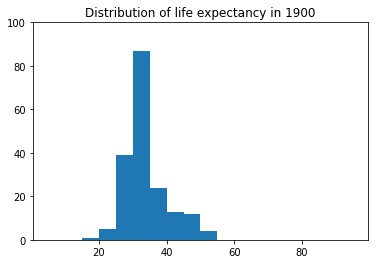

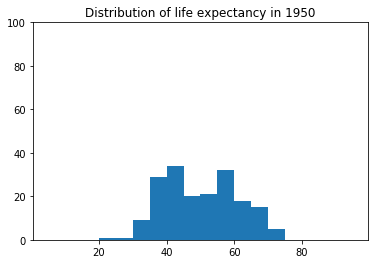

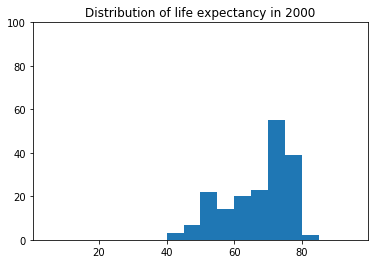

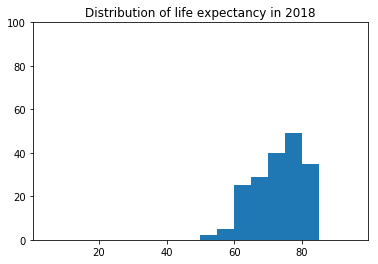

In [347]:
bins = list(range(5,100,5));
for year in ['1900', '1950', '2000', '2018']:
    plt.title('Distribution of life expectancy in ' + year)
    plt.ylim(top=100)
    plt.hist(df_le[year], bins);
    plt.show()

We can see that the life expectancy is in general growing with time. The histogram is also getting more narrow, so most of the people seem to have similar life expectancy now. Life expectancy isn't still getting greater than 85.

Let's move on to dtp3 vaccination percentage.

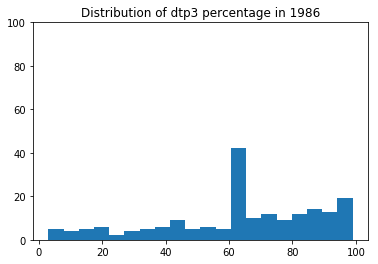

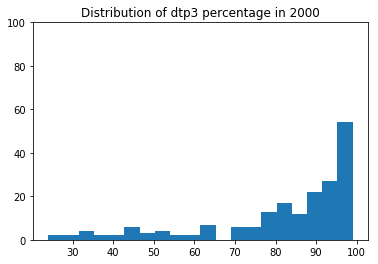

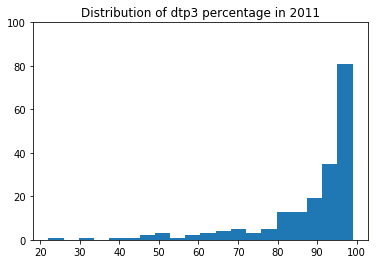

In [348]:
for year in ['1986', '2000', '2011']:
    plt.title('Distribution of dtp3 percentage in ' + year)
    plt.ylim(top=100)
    plt.hist(df_dtp3[year], 20);
    plt.show()

Finally, let's see how men's and women's education years changed over time.

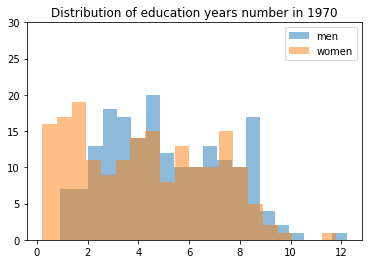

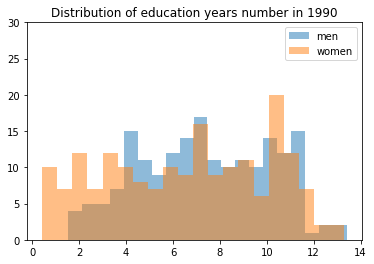

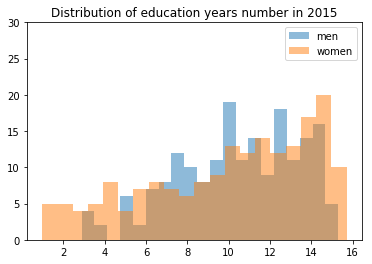

In [349]:
for year in ['1970', '1990', '2015']:
    plt.title('Distribution of education years number in ' + year)
    plt.ylim(top=30)
    plt.hist(df_school_men[year], 20, alpha = 0.5, label = 'men');
    plt.hist(df_school_women[year], 20, alpha = 0.5, label = 'women');
    plt.legend()
    plt.show()

We can see that on the whole people tend to be spending more time studying than they did in 1970. We can also see that there are more women than men who are getting extremely little education; however in 2015 there are more women than men who are spending 13 to 16 years in school.

Let us now explore our variables on the whole and their connection to each other.

We're going to start with life expextancy.

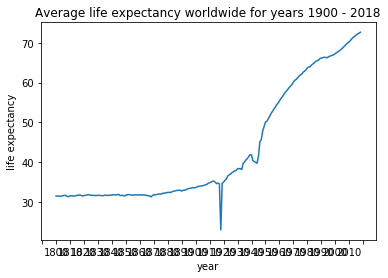

In [350]:
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(25))
plt.title('Average life expectancy worldwide for years 1900 - 2018') 
plt.xlabel('year') 
plt.ylabel('life expectancy')
plt.rcParams["figure.figsize"] = [12,9]
plt.plot(df_le.mean())
plt.show()

We can see a major drop around 1920, it might be interesting to see it closer.

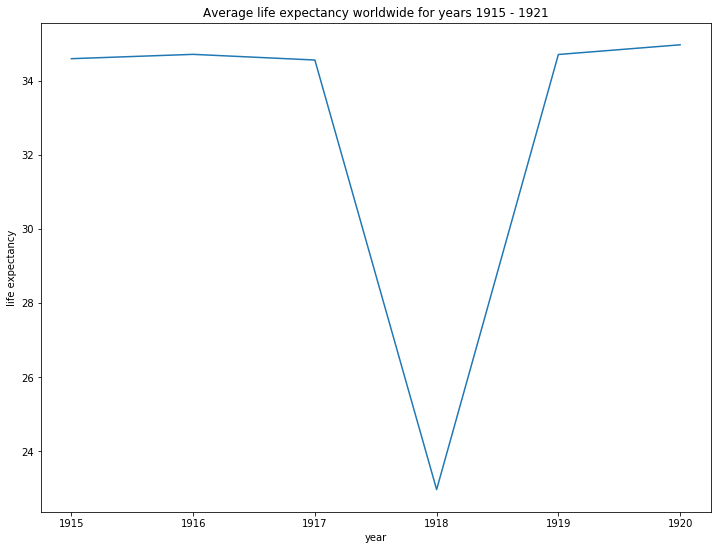

In [351]:
years = []
for i in range(1915, 1921):
    years.append(str(i))
df_drop_1 = df_le[years]

ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.title('Average life expectancy worldwide for years 1915 - 1921') 
plt.xlabel('year') 
plt.ylabel('life expectancy')
plt.rcParams["figure.figsize"] = [12,9]
plt.plot(df_drop_1.mean());

plt.show()

We can see that the lowest point is in 1918 in the same time as World War I, the drop being 12 years. As of World War II, on the previous plot we can see that the drop was not quite as dramatic as this one.

We've seen the general trends in life expectancy and can now explore it in more detail. First, let's find three countries where life expectancy has been growing the fastest and three countries where it has been growing the slowest.

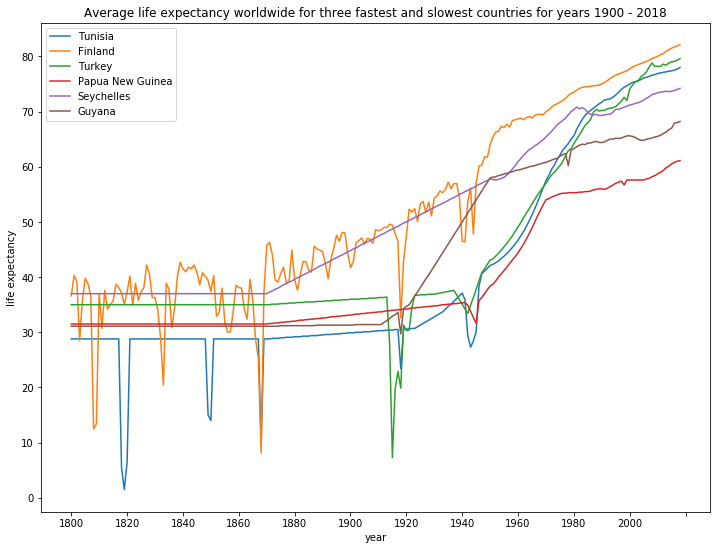

In [352]:
df_le['diff'] = df_le.max(axis = 'columns') - df_le.min(axis = 'columns') # finding the range for each country

le_large_small = df_le.nlargest(3, 'diff').append(df_le.nsmallest(3, 'diff')) # a dataframe for fastest and slowest countries
ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
le_large_small.index.name = 'geo'

df_le.drop('diff', axis = 1, inplace = True);
le_large_small.drop('diff', axis = 1, inplace = True);

for geo,row in le_large_small.iterrows():
    plt.plot(row, label=geo)

plt.title('Average life expectancy worldwide for three fastest and slowest countries for years 1900 - 2018') 
plt.xlabel('year') 
plt.ylabel('life expectancy')
plt.rcParams["figure.figsize"] = [12,9]
plt.legend()
plt.show()    

There is a significant difference between the fastest-growing countries and the slowest-growing countries, still we can not clearly distinguish between two groups of countries.

Let us now see similar plots for other indicators.

First let's explore the vaccination data.

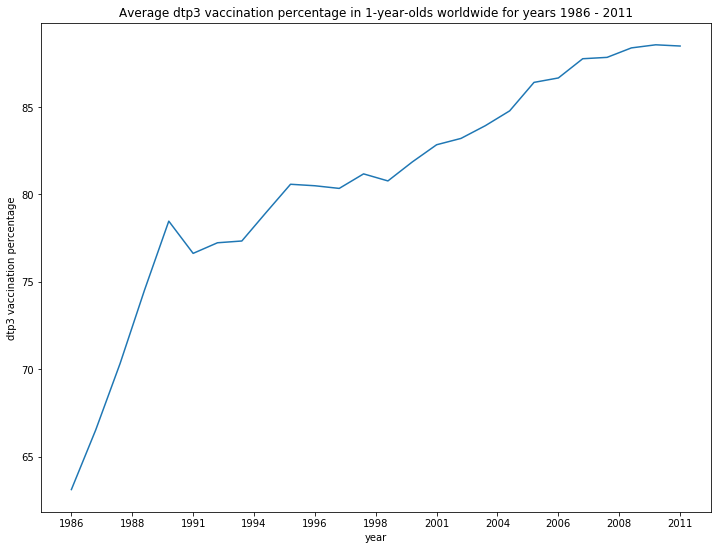

In [353]:
ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.title('Average dtp3 vaccination percentage in 1-year-olds worldwide for years 1986 - 2011') 
plt.xlabel('year') 
plt.ylabel('dtp3 vaccination percentage')
plt.rcParams["figure.figsize"] = [12,9]

plt.plot(df_dtp3.mean());
plt.show()

Let us now find three fastest-growing countries and three slowest-growing countries.

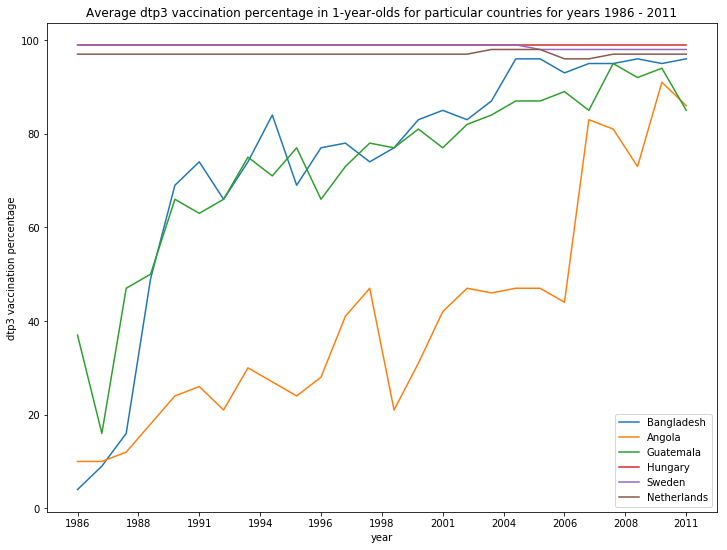

In [354]:
df_dtp3['diff'] = df_dtp3.max(axis = 'columns') - df_dtp3.min(axis = 'columns')

dtp3_large_small = df_dtp3.nlargest(3, 'diff').append(df_dtp3.nsmallest(3, 'diff'))
ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
dtp3_large_small.index.name = 'geo'

df_dtp3.drop('diff', axis = 1, inplace = True);
dtp3_large_small.drop('diff', axis = 1, inplace = True);

plt.title('Average dtp3 vaccination percentage in 1-year-olds for particular countries for years 1986 - 2011') 
plt.xlabel('year') 
plt.ylabel('dtp3 vaccination percentage')
plt.rcParams["figure.figsize"] = [12,9]

for geo,row in dtp3_large_small.iterrows():
    plt.plot(row, label=geo)
plt.legend()
plt.show();

On this plot we can clearly see that:
- the slowest-growing countries and the fastest-growing countries form two distinctive groups;
- the slowest-growing countries actually are in better situation than the fastest-growing ones.

To see if the distinction is statistically significant we'll perform the Kolmogorov-Smirnov test for the following country pairs:
- Angola and Guatemala
- Guatemala and Hungary
- Hungary and Sweden
- Bangladesh and Guatemala

In [375]:
print("Angola vs Guatemala: " + str(ks_2samp(dtp3_large_small.loc['Angola'][:-1], dtp3_large_small.loc['Guatemala'][:-1])))
print("Hungary vs Guatemala: " + str(ks_2samp(dtp3_large_small.loc['Hungary'][:-1], dtp3_large_small.loc['Guatemala'][:-1])))
print("Hungary vs Sweden: " + str(ks_2samp(dtp3_large_small.loc['Hungary'][:-1], dtp3_large_small.loc['Sweden'][:-1])))
print("Bangladesh vs Guatemala: " + str(ks_2samp(dtp3_large_small.loc['Bangladesh'][:-1], dtp3_large_small.loc['Guatemala'][:-1])))

Angola vs Guatemala: Ks_2sampResult(statistic=0.6923076923076923, pvalue=2.6778842767252846e-06)
Hungary vs Guatemala: Ks_2sampResult(statistic=1.0, pvalue=1.1142684162303478e-12)
Hungary vs Sweden: Ks_2sampResult(statistic=0.2692307692307692, pvalue=0.2581383246328401)
Bangladesh vs Guatemala: Ks_2sampResult(statistic=0.23076923076923084, pvalue=0.44018710835583014)


We can see that though the indicators within a group seem similar but there's a country in the fastest-growing group (Angola) which doesn't actually belong to it. For the other countries within a group the p-value is high suggesting that the samples belong to the same distribution.

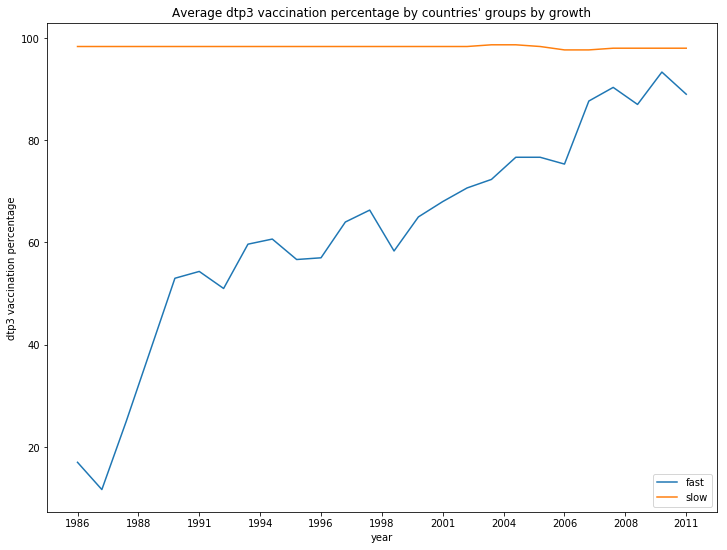

In [356]:
dtp3_large_small['growth'] = ['fast', 'fast', 'fast', 'slow', 'slow', 'slow']
#dtp3_large_small.drop('diff', axis = 1, inplace = True)
to_plot = dtp3_large_small.groupby('growth').mean()
to_plot.index.name = 'growth';

ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.title('Average dtp3 vaccination percentage by countries\' groups by growth') 
plt.xlabel('year') 
plt.ylabel('dtp3 vaccination percentage')
plt.rcParams["figure.figsize"] = [12,9]

for growth,row in to_plot.iterrows():
    plt.plot(row, label=growth)
plt.legend()
plt.show();

On this plot we can see that the dtp3 vaccination percentage in slower-growing countries is actually decreasing though the situation is still better there than in faster-growing countries.

To explore men's and women's average years in school we'll build the corresponding plots on the same figure. We'll also be exploring them side by side from now on.

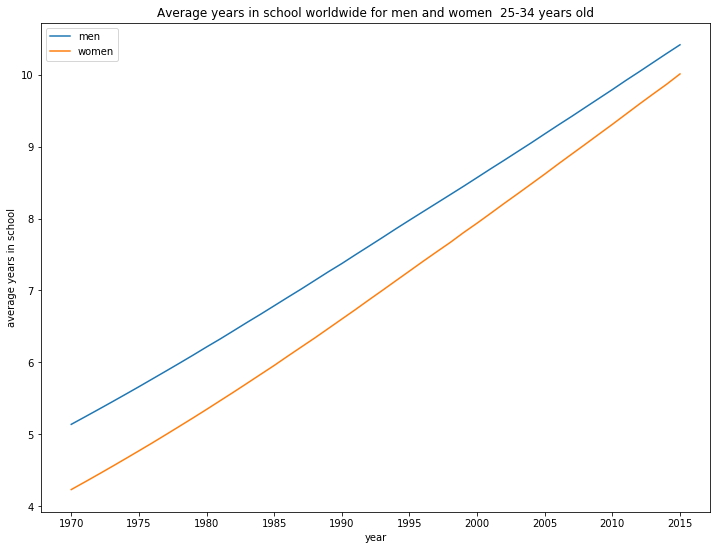

In [357]:
# men and women on the same plot
ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

plt.title('Average years in school worldwide for men and women  25-34 years old') 
plt.xlabel('year') 
plt.ylabel('average years in school')
plt.rcParams["figure.figsize"] = [12,9]

plt.plot(df_school_men.mean(), label = 'men');
plt.plot(df_school_women.mean(), label = 'women');
plt.legend();

We can see that both for men and women there's a constant growing trend. Now let us explore three fastest-growing countries and three slowest-growing countries for average number of years in school for men and women.

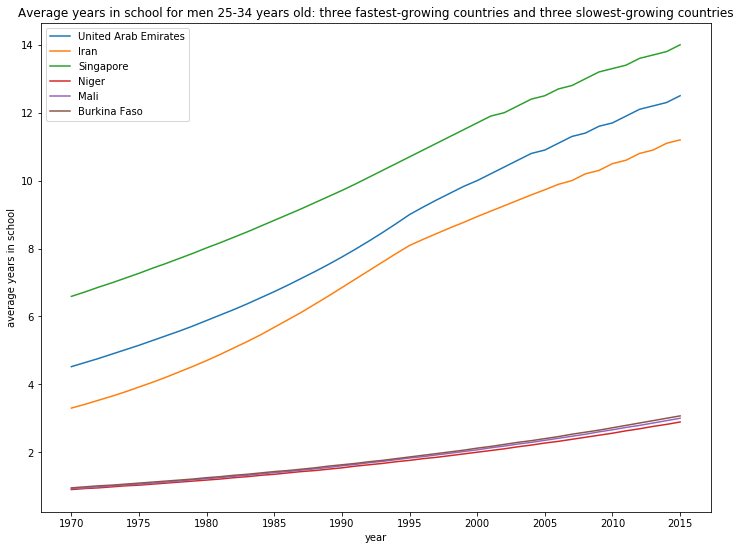

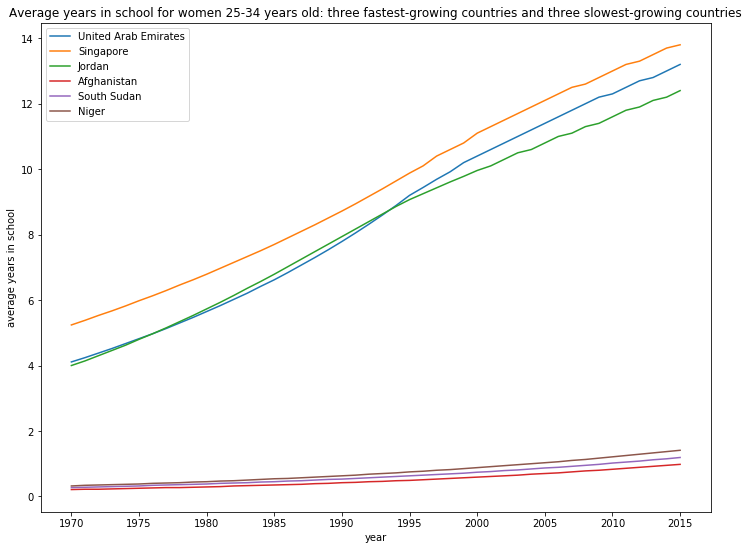

In [358]:
# three fastest-growing and three slowest-growing countries for men's average number of years in school
df_school_men['diff'] = df_school_men.max(axis = 'columns') - df_school_men.min(axis = 'columns')

df_school_men_large_small = df_school_men.nlargest(3, 'diff').append(df_school_men.nsmallest(3, 'diff'))
ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
df_school_men.index.name = 'geo'

df_school_men.drop('diff', axis = 1, inplace = True);
df_school_men_large_small.drop('diff', axis = 1, inplace = True);

plt.title('Average years in school for men 25-34 years old: three fastest-growing countries and three slowest-growing countries') 
plt.xlabel('year') 
plt.ylabel('average years in school')
plt.rcParams["figure.figsize"] = [12,9]

for geo,row in df_school_men_large_small.iterrows():
    plt.plot(row, label=geo)
plt.legend()
plt.show();

# three fastest-growing and three slowest-growing countries for women's average years in school
df_school_women['diff'] = df_school_women.max(axis = 'columns') - df_school_women.min(axis = 'columns')

df_school_women_large_small = df_school_women.nlargest(3, 'diff').append(df_school_women.nsmallest(3, 'diff'))
ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
df_school_women.index.name = 'geo'

df_school_women.drop('diff', axis = 1, inplace = True);
df_school_women_large_small.drop('diff', axis = 1, inplace = True);

plt.title('Average years in school for women 25-34 years old: three fastest-growing countries and three slowest-growing countries') 
plt.xlabel('year') 
plt.ylabel('average years in school')
plt.rcParams["figure.figsize"] = [12,9]

for geo,row in df_school_women_large_small.iterrows():
    plt.plot(row, label=geo)
plt.legend()
plt.show();

On these plots we can see the following:
- both for men and women the fastest-growing countries and the slowest-growing countries form two distinctive groups;
- United Arab Emirates and Singapore are among the fastest-growing countries both for men's and women's average number of years spent in school;
- Niger is among the slowest-growing countries both for men's and women's average number of years spent in school;
- the difference in three fastest-growing countries in men's average number of years spent in school is larger than the difference in three fastest-growing countries in women's average number of years spent in school.

To see if the distinction is statistically significant we'll perform the Kolmogorov-Smirnov test for the women's average years in school in the following country pairs:
- Afghanistan and South Sudan;
- Jordan and Niger;
- United Arab Emirates and Singapore.

In [359]:
print("Afghanistan vs South Sudan: " + str(ks_2samp(df_school_women_large_small.loc['Afghanistan'][:-1], df_school_women_large_small.loc['South Sudan'][:-1])))

print("Jordan vs Niger: " + str(ks_2samp(df_school_women_large_small.loc['Jordan'][:-1], df_school_women_large_small.loc['Niger'][:-1])))

print("United Arab Emirates vs Singapore: " + str(ks_2samp(df_school_women_large_small.loc['United Arab Emirates'][:-1], df_school_women_large_small.loc['Singapore'][:-1])))


Afghanistan vs South Sudan: Ks_2sampResult(statistic=0.1777777777777778, pvalue=0.43731993808028097)
Jordan vs Niger: Ks_2sampResult(statistic=1.0, pvalue=3.631288141311546e-21)
United Arab Emirates vs Singapore: Ks_2sampResult(statistic=0.17777777777777778, pvalue=0.4373199380802812)


We can see that within each group the data for the countries both belong to one distribution (like Afghanistan and South Sudan and United Arab Emirates and Singapore : the p-value is large), but the data from different groups belong to different distributions (like Jordan and Niger: the p-value is extremely small).

Now we'll plot the average for each group for men and women.

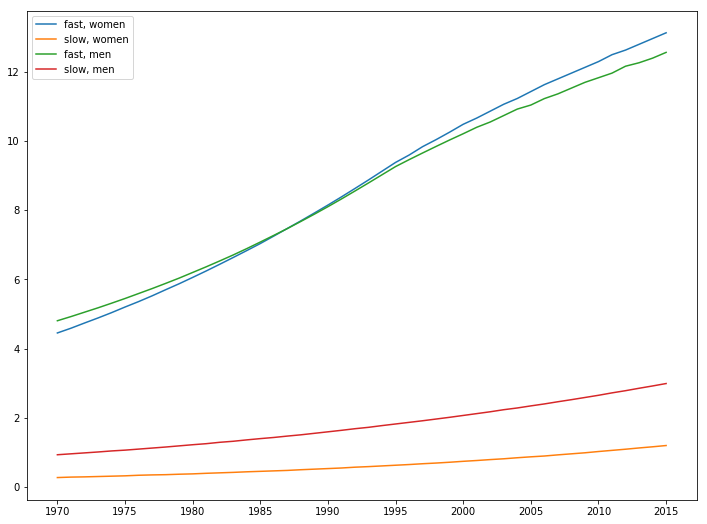

In [360]:
df_school_men_large_small['growth'] = ['fast, men', 'fast, men', 'fast, men', 'slow, men', 'slow, men', 'slow, men']
to_plot = df_school_men_large_small.groupby('growth').mean()
to_plot.index.name = 'growth';

df_school_women_large_small['growth'] = ['fast, women', 'fast, women', 'fast, women', 'slow, women', 'slow, women', 'slow, women']
to_plot_w = df_school_women_large_small.groupby('growth').mean()
to_plot_w.index.name = 'growth';

ax = plt.axes();
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
for growth,row in to_plot_w.iterrows():
    plt.plot(row, label=growth)

for growth,row in to_plot.iterrows():
    plt.plot(row, label=growth)
plt.legend()
plt.show();

We can see that on average, in the faster-growing countries the number of women's schooling years grows faster than men's, whereas in the slower-growing countries the gap between men and women is growing.

Now let us explore the correlations between indicators considered. For this it will be more convenient if all the data are in the same dataframe. We don't need the whole life expectancy dataframe as the rest of the dataframes only have data starting from 1970 (for education years) or even 1980 (for dtp3 vaccination percentage).

In [361]:
#renaming dataframes' columns to easier distinguish them in the large dataframe 
df_le.rename(lambda x: 'le_' + x, axis = 1, inplace = True)
df_dtp3.rename(lambda x: 'dtp3_' + x, axis = 1, inplace = True)
df_school_men.rename(lambda x: 'sch_men_' + x, axis = 1, inplace = True)
df_school_women.rename(lambda x: 'sch_women_' + x, axis = 1, inplace = True)

In [362]:
# we'll make one large dataframe with dtp3 data from 1986 to 2011 and le, sch_men and sch_women data from 1970 to 2015.
years_of_interest = [] # array of columns to take from the life expectancy dataframe
for year in range(1970, 2016):
    years_of_interest.append('le_' + str(year))
common_all = df_le[years_of_interest].join(df_dtp3, how = 'inner').join(df_school_men, how = 'inner').join(df_school_women, how = 'inner')

In [363]:
common_all.head()

,le_1970,le_1971,le_1972,le_1973,le_1974,le_1975,le_1976,le_1977,le_1978,le_1979,...,sch_women_2006,sch_women_2007,sch_women_2008,sch_women_2009,sch_women_2010,sch_women_2011,sch_women_2012,sch_women_2013,sch_women_2014,sch_women_2015
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,45.8,45.9,45.9,46.0,46.1,46.3,46.5,46.6,45.0,43.6,...,0.72,0.75,0.78,0.80,0.83,0.86,0.89,0.92,0.95,0.98
Albania,67.4,68.0,68.6,69.2,69.8,70.3,70.8,71.3,71.7,72.0,...,10.80,11.00,11.10,11.30,11.50,11.60,11.80,11.90,12.10,12.30
Algeria,57.5,57.8,58.2,58.5,59.1,59.5,60.0,60.6,61.2,61.9,...,6.35,6.50,6.65,6.80,6.95,7.11,7.26,7.42,7.58,7.74
Andorra,76.0,76.3,76.6,76.9,77.2,77.4,77.7,78.0,78.3,78.6,...,13.90,14.10,14.20,14.30,14.50,14.60,14.80,14.90,15.00,15.10
Angola,48.7,49.0,49.2,49.4,49.6,49.5,49.5,49.6,49.7,49.8,...,4.19,4.30,4.42,4.54,4.66,4.79,4.92,5.04,5.18,5.31


In [364]:
common_all.shape

(185, 164)

We are going to study life expectancy as dependant variable; dtp3 and education years as independent variables.
First we'll count the correlation coefficients between all of them. 

First, we will explore the correlation for every year between life expectancy and men's and women's average schooling years.

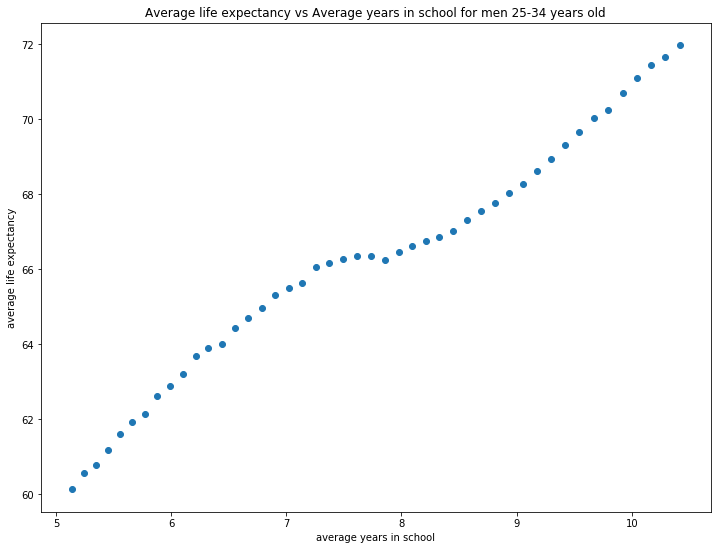

In [365]:
plt.scatter(df_school_men.mean(), df_le[years_of_interest].mean());
plt.title('Average life expectancy vs Average years in school for men 25-34 years old') 
plt.xlabel('average years in school') 
plt.ylabel('average life expectancy')
plt.rcParams["figure.figsize"] = [12,9]

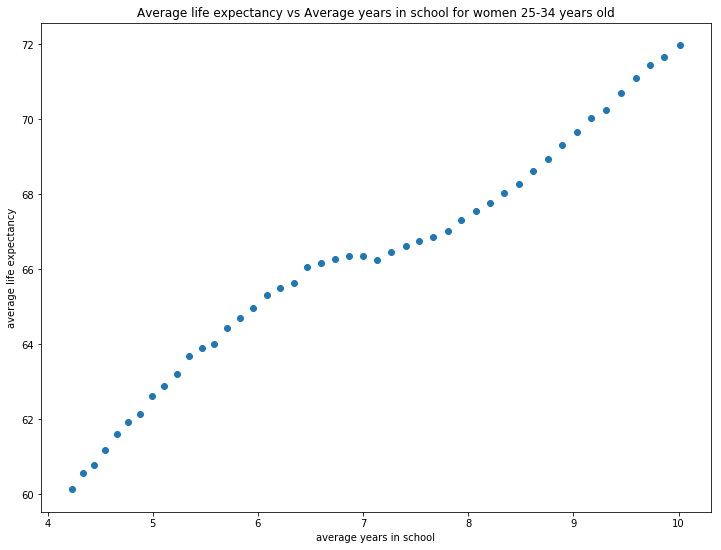

In [366]:
plt.scatter(df_school_women.mean(), df_le[years_of_interest].mean());
plt.title('Average life expectancy vs Average years in school for women 25-34 years old') 
plt.xlabel('average years in school') 
plt.ylabel('average life expectancy')
plt.rcParams["figure.figsize"] = [12,9]

For both men's and women's education the correlation seems to be pretty strong. We can now check if men's education or women's education correlates stronger with the life expectancy.

In [367]:
years = range(1970,2016)
corr_men = pd.DataFrame(index = years, columns = ['correlation_coef'])
coefs_men = [];
for year in years:
    coefs_men.append(common_all['le_' + str(year)].corr(common_all['sch_men_' + str(year)]));
corr_men['correlation_coef'] = coefs_men;
coefs_women = [];
corr_women = pd.DataFrame(index = years, columns = ['correlation_coef'])
for year in years:
    coefs_women.append(common_all['le_' + str(year)].corr(common_all['sch_women_' + str(year)]));
corr_women['correlation_coef'] = coefs_women;

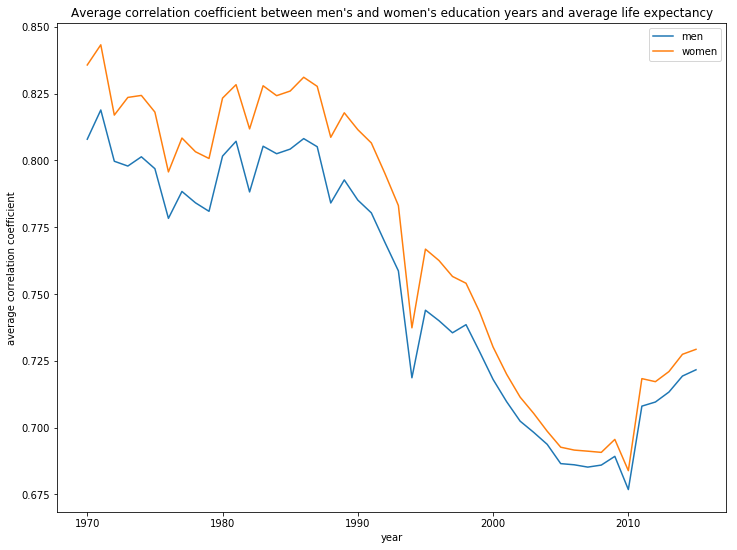

In [368]:
plt.plot(corr_men, label = 'men');
plt.plot(corr_women, label = 'women');
plt.title('Average correlation coefficient between men\'s and women\'s education years and average life expectancy')

plt.xlabel('year') 
plt.ylabel('average correlation coefficient')
plt.rcParams["figure.figsize"] = [12,9]
plt.legend();

So here we can see that although education years of women of 25 to 34 years worldwide correlated stronger with average life expectancy than men's of 25 to 34 education years did, the difference is getting smaller with time. 

Let's now move on to how dtp3 vaccination is correlated with average life expectancy.

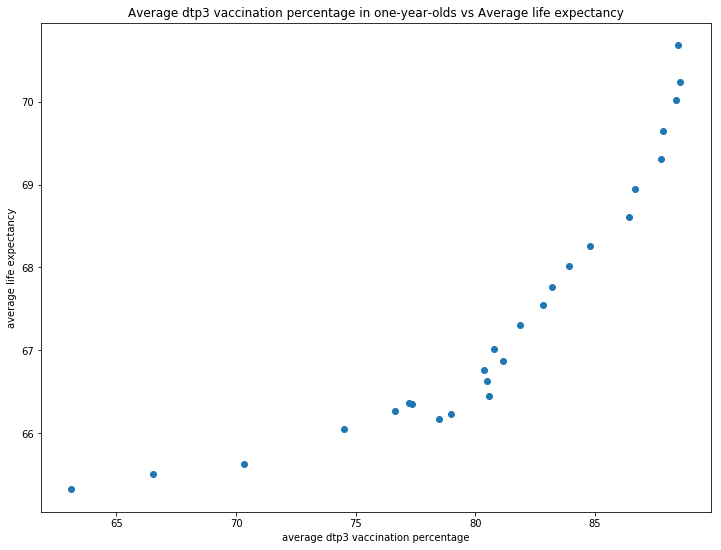

In [369]:
years_of_interest = [] # array of columns to take from the life expectancy dataframe
for year in range(1986, 2012):
    years_of_interest.append('le_' + str(year))

plt.scatter(df_dtp3.mean(), df_le[years_of_interest].mean());
plt.title('Average dtp3 vaccination percentage in one-year-olds vs Average life expectancy') 
plt.xlabel('average dtp3 vaccination percentage') 
plt.ylabel('average life expectancy')
plt.rcParams["figure.figsize"] = [12,9]

There seems to be a clear correlation between average dtp3 vaccination percentage in one-year-olds and average life expectancy. Let us count the correlation coefficients.

In [370]:
years_dtp3 = range(1986,2012)
coefs_dtp3 = []
corr_dtp3 = pd.DataFrame(index = years_dtp3, columns = ['correlation_coef'])
for year in years_dtp3:
    coefs_dtp3.append(common_all['le_' + str(year)].corr(common_all['dtp3_' + str(year)]));

corr_dtp3['correlation_coef'] = coefs_dtp3;

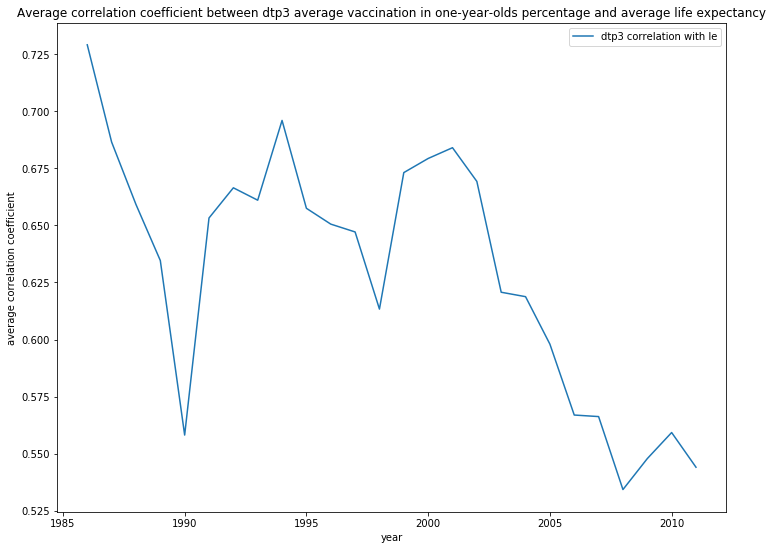

In [371]:
plt.plot(corr_dtp3, label = 'dtp3 correlation with le');
plt.title('Average correlation coefficient between dtp3 average vaccination in one-year-olds percentage and average life expectancy')

plt.xlabel('year') 
plt.ylabel('average correlation coefficient')
plt.rcParams["figure.figsize"] = [12,9]
plt.legend();

Here we can see that these indicators are correlated, although there is no consistent trend in the correlation coefficient and there are some major drops which can be seen on the plot.

It is also interesting how numbers of men's and women's education years are correlated with average vaccination percentage. 

In [372]:
years = range(1986,2012)
corr_men = pd.DataFrame(index = years, columns = ['correlation_coef'])
coefs_men = [];
for year in years:
    coefs_men.append(common_all['dtp3_' + str(year)].corr(common_all['sch_men_' + str(year)]));
corr_men['correlation_coef'] = coefs_men;
coefs_women = [];
corr_women = pd.DataFrame(index = years, columns = ['correlation_coef'])
for year in years:
    coefs_women.append(common_all['dtp3_' + str(year)].corr(common_all['sch_women_' + str(year)]));
corr_women['correlation_coef'] = coefs_women;

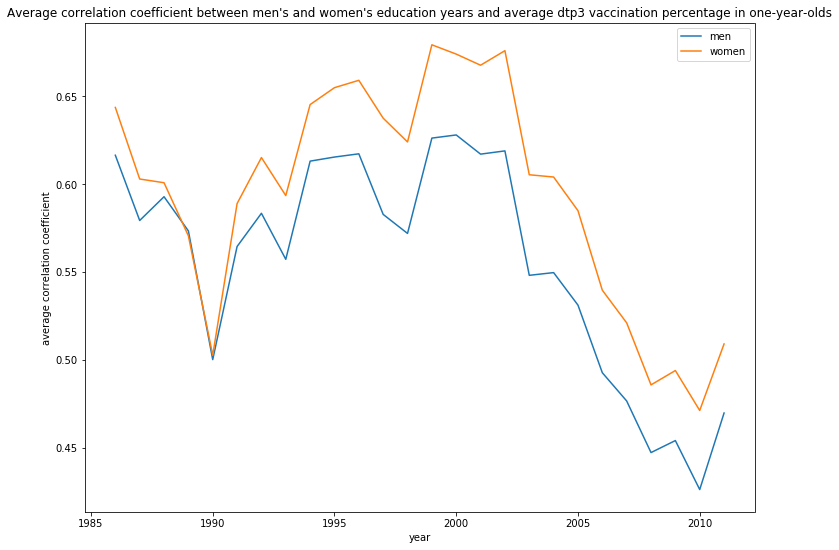

In [373]:
plt.plot(corr_men, label = 'men');
plt.plot(corr_women, label = 'women');
plt.title('Average correlation coefficient between men\'s and women\'s education years and average dtp3 vaccination percentage in one-year-olds')

plt.xlabel('year') 
plt.ylabel('average correlation coefficient')
plt.rcParams["figure.figsize"] = [12,9]
plt.legend();

We see that education years number positively correlates with the dtp3 vaccination percentage. We also see that the number of education years among women of 25 to 34 years is in general stronger correlated with the dtp3 vaccination percentage than the number of education years among men of 25 to 34 years. However, the difference in correlation coefficients is not constant and correlation coefficients for both men's and women's education are in general getting smaller with time.

<a id='conclusion'></a>
## Conclusion
We've explored several indicators for multiple countries, the smallest dataframe containing information for 187 countries. While cleaning the data we've excluded quite a lot of data from the dtp3 vaccination dataframe, which has clearly influenced the analysis. We did't have to remove or change any data in the men's and women's education years dataframes and we've only changed three out of 187 rows in the life expectancy dataframe.

All of the indicators considered are growing with time, however, for each indicator there are countries which grow faster and countries which grow slower. 

Life expectancy is correlated with all the other indicators. All the other indicators are correlated, too. The correlation coefficients are mostly getting smaller with time but still stay positive.

For some indicators, the fastest-growing countries and the slowest-growing countries seem to form distinctive groups. We've performed the Kolmogorov-Smirnov two-sample tests for some of the country pairs for some indicators. However the results might not be accurate as the sample sizes are actually relatively small - less than 50 for all the indicators explored.